In [3]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [16]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [17]:
df['year']=[y.year for y in df['Day']]
df = df.set_index(['year', df.index])
df['month']=[m.month for m in df['Day']]
df = df.set_index(['month', df.index])
df['day']=[d.day for d in df['Day']]
df = df.set_index(['day', df.index])
del df['Day']
df

,,,,t
day,month,year,,
1,1,2008,0,0
2,1,2008,1,-5
3,1,2008,2,-11
4,1,2008,3,-11
5,1,2008,4,-12
...,...,...,...,...
27,12,2016,3280,1
28,12,2016,3281,-3
29,12,2016,3282,0


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [18]:
print('Самый холодный год: ',df.mean(level='year').idxmin().t, ' Самый теплый год: ', df.mean(level='year').idxmax().t)

Самый холодный год:  2012  Самый теплый год:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [28]:
df.loc[(df.t>=0) & (df.index.get_level_values('month') ==1)].count(level='year').idxmax().t

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [25]:
df.loc[(df.index.get_level_values('month') >=6) & (df.index.get_level_values('month') <=8)].mean(level='year').idxmin().t

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [31]:
df['$\Delta$ t']=(df['t']-df['t'].shift(-1)).abs()
k = df['$\Delta$ t'].idxmax()
print(k[0],'-',k[1],'-',k[2])

26 - 5 - 2014


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

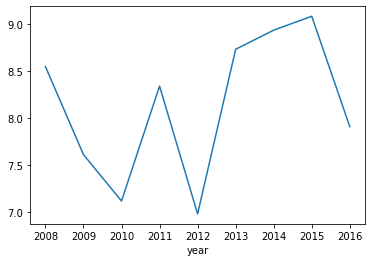

In [30]:
df.mean(level='year').t.plot()